In [2]:
# importing relvant libraries
import math
import matplotlib.pyplot as plt
plt.style.use(['science','ieee'])
plt.rcParams.update({'text.usetex': False})

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

import numpy as np

from ComPhy import *

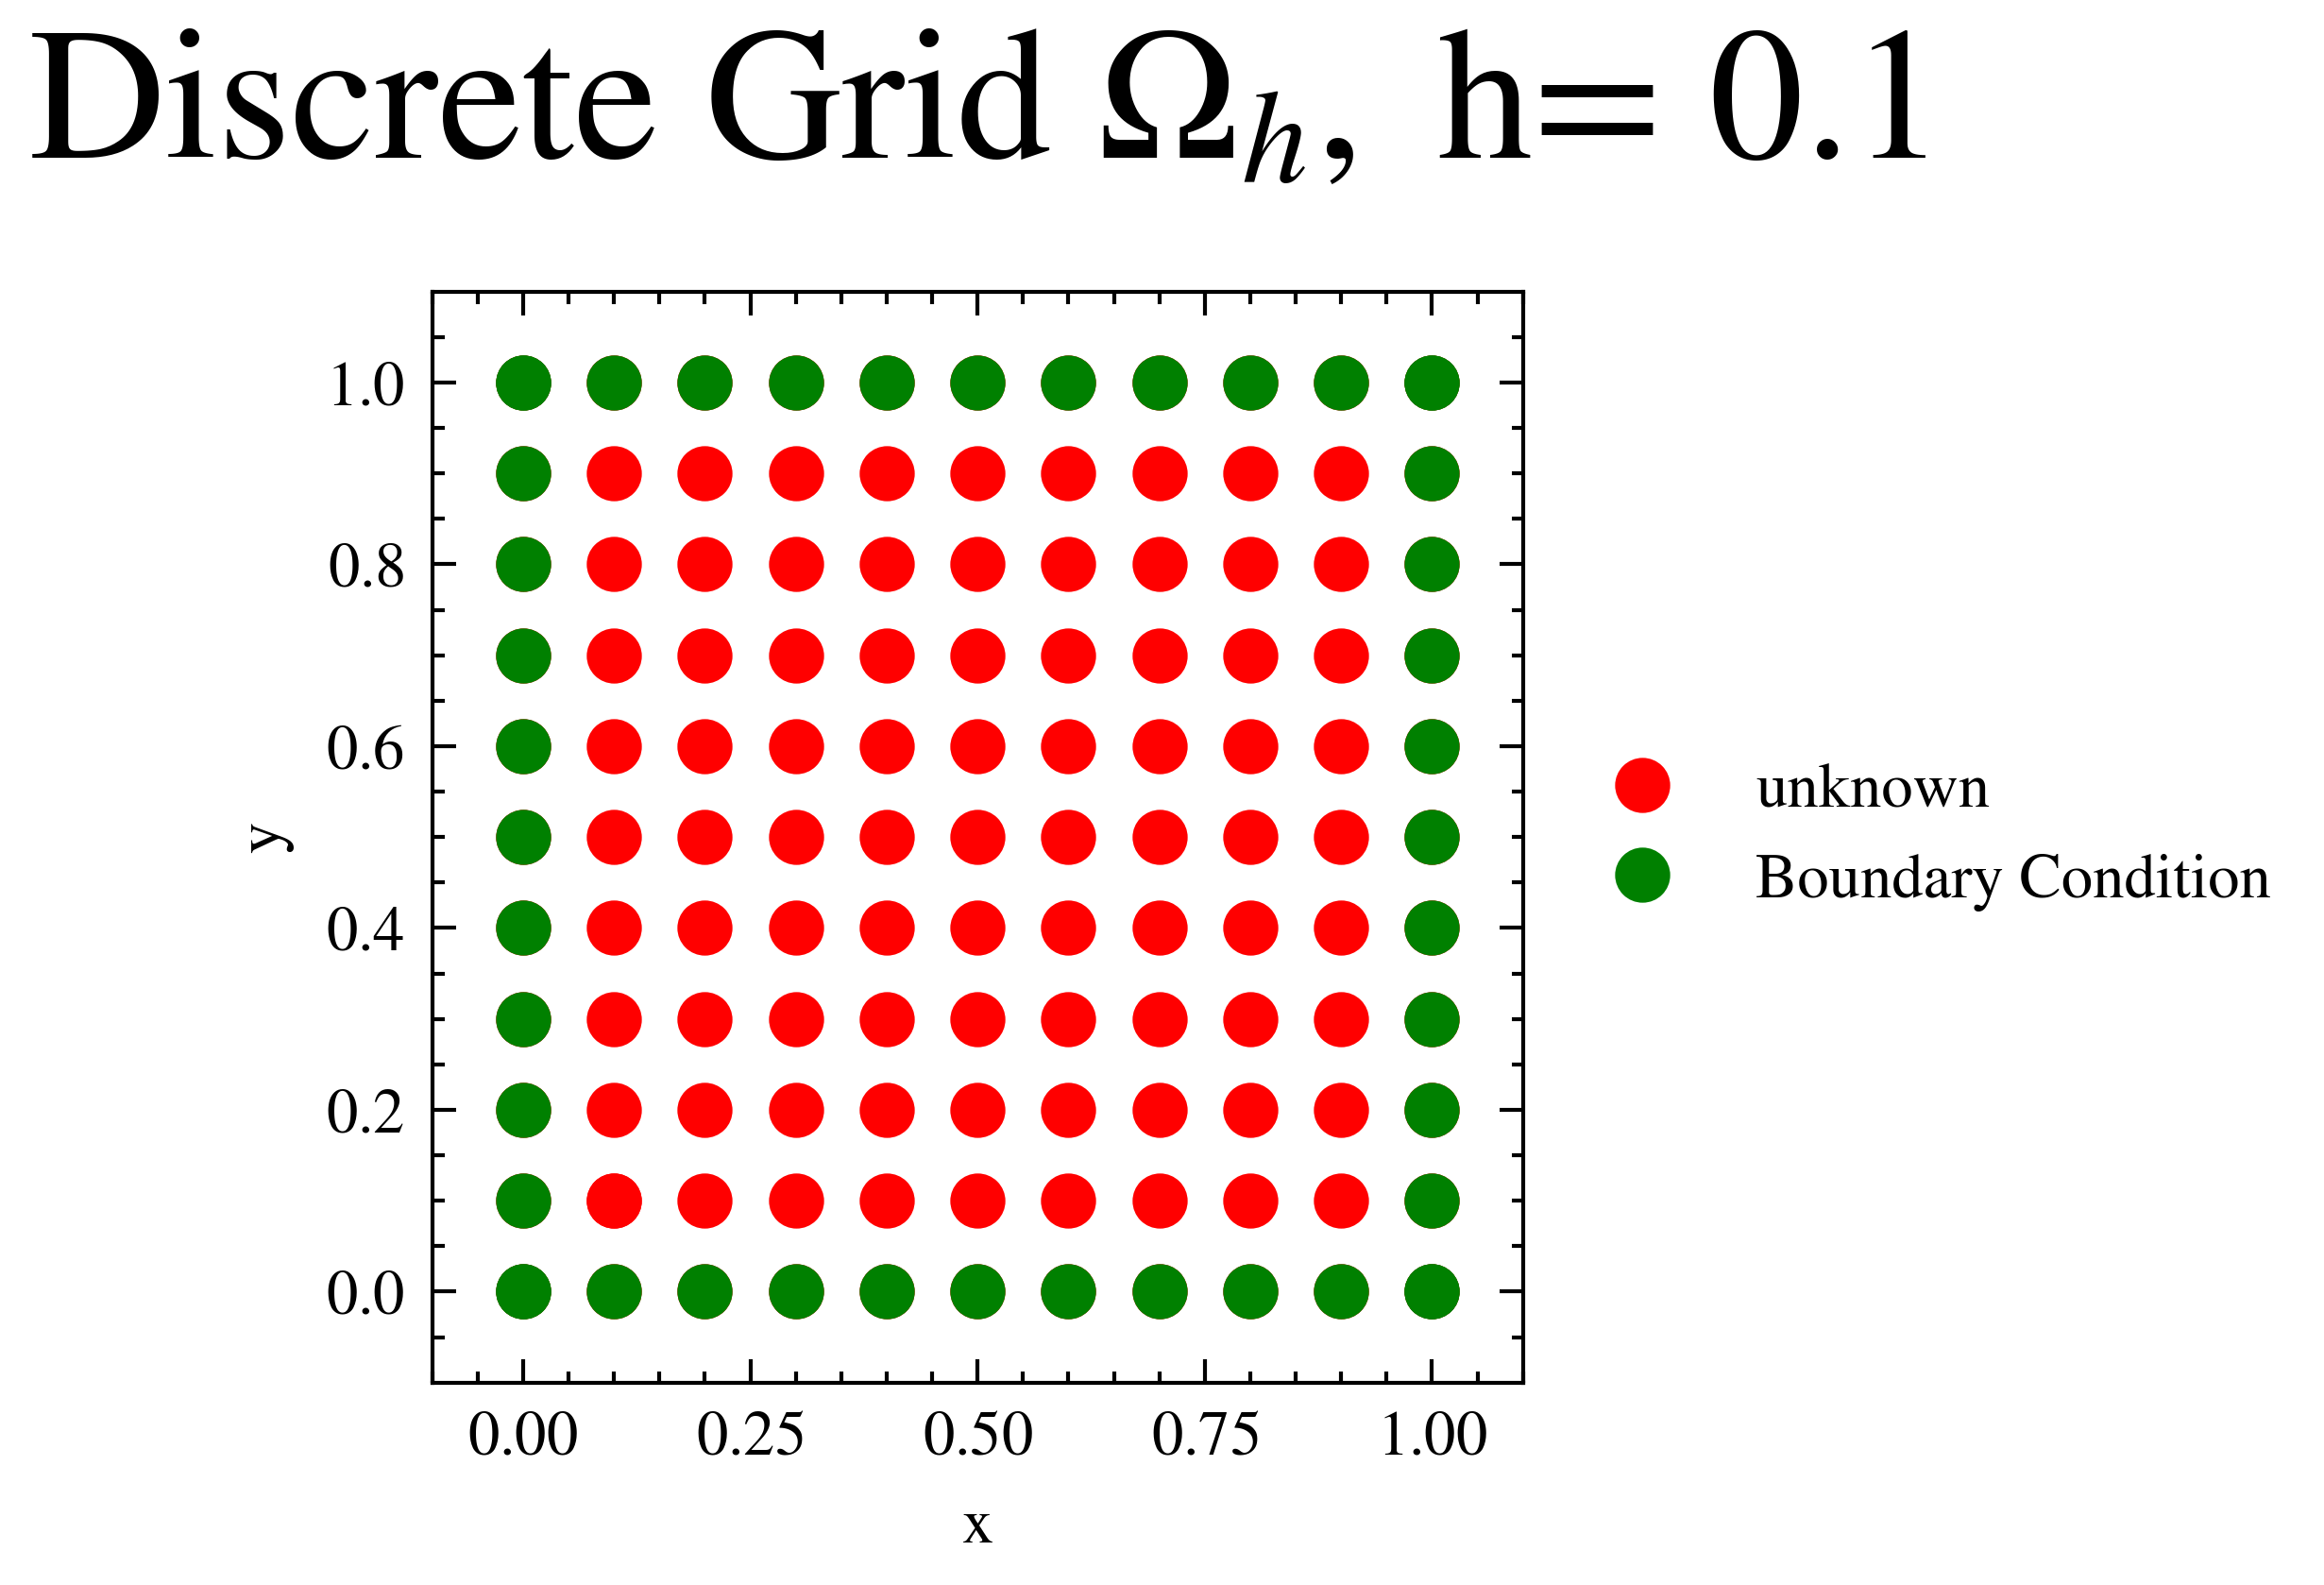

In [22]:
N=10
h=1/N
x=np.arange(0,1.0001,h)
y=np.arange(0,1.0001,h)
X, Y = np.meshgrid(x, y)
fig = plt.figure()
plt.plot(x[1],y[1],'ro',label='unknown');
plt.plot(X,Y,'ro');
plt.plot(np.ones(N+1),y,'go',label='Boundary Condition');
plt.plot(np.zeros(N+1),y,'go');
plt.plot(x,np.zeros(N+1),'go');
plt.plot(x, np.ones(N+1),'go');
plt.xlim((-0.1,1.1))
plt.ylim((-0.1,1.1))
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(r'Discrete Grid $\Omega_h,$ h= %s'%(h),fontsize=24,y=1.08)
plt.show();

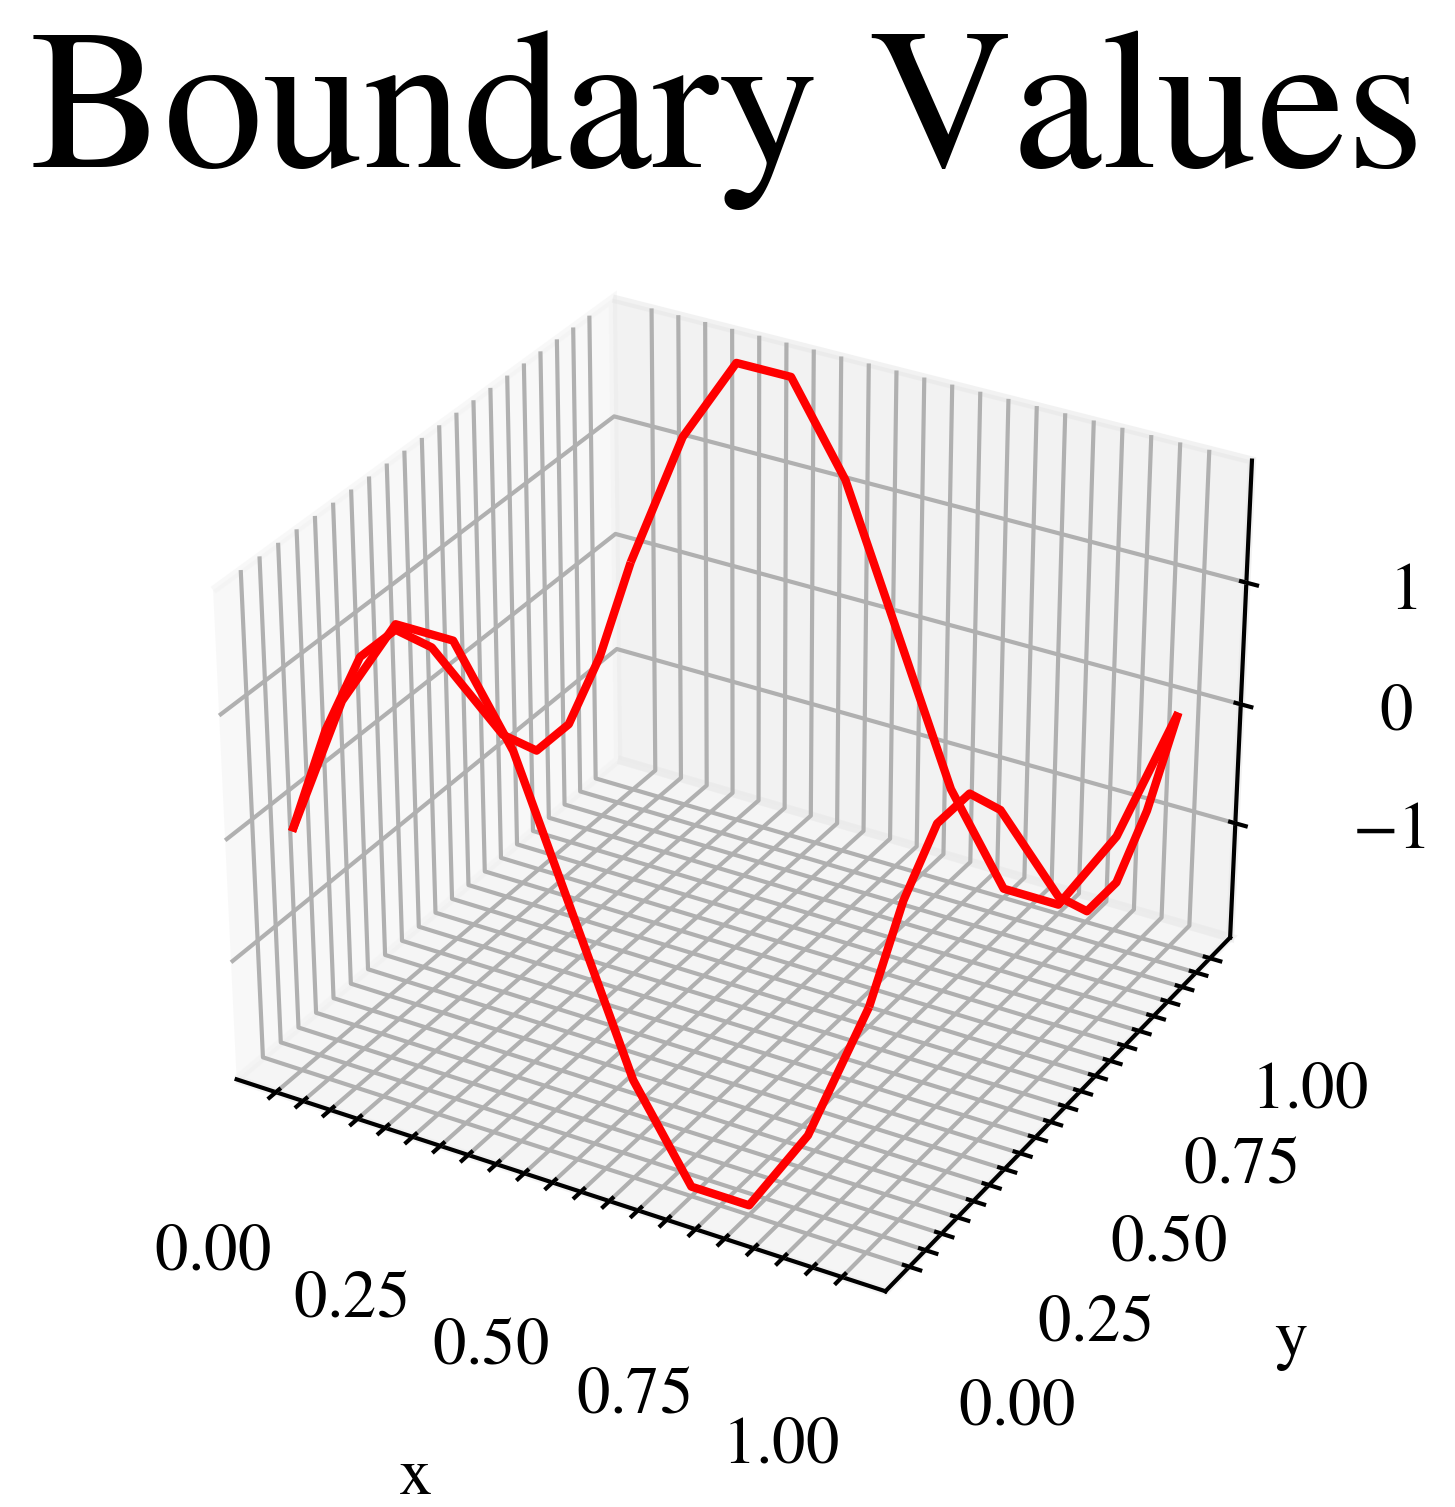

In [23]:
w=np.zeros((N+1,N+1))

for i in range (0,N):
        w[i,0]=np.sin(2*np.pi*x[i]) #left Boundary
        w[i,N]=np.sin(2*np.pi*x[i]) #Right Boundary

for j in range (0,N):
        w[0,j]=2*np.sin(2*np.pi*y[j]) #Lower Boundary
        w[N,j]=2*np.sin(2*np.pi*y[j]) #Upper Boundary

        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot a basic wireframe.
ax.plot_wireframe(X, Y, w,color='r', rstride=10, cstride=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('w')
plt.title(r'Boundary Values',fontsize=24,y=1.08)
plt.show()

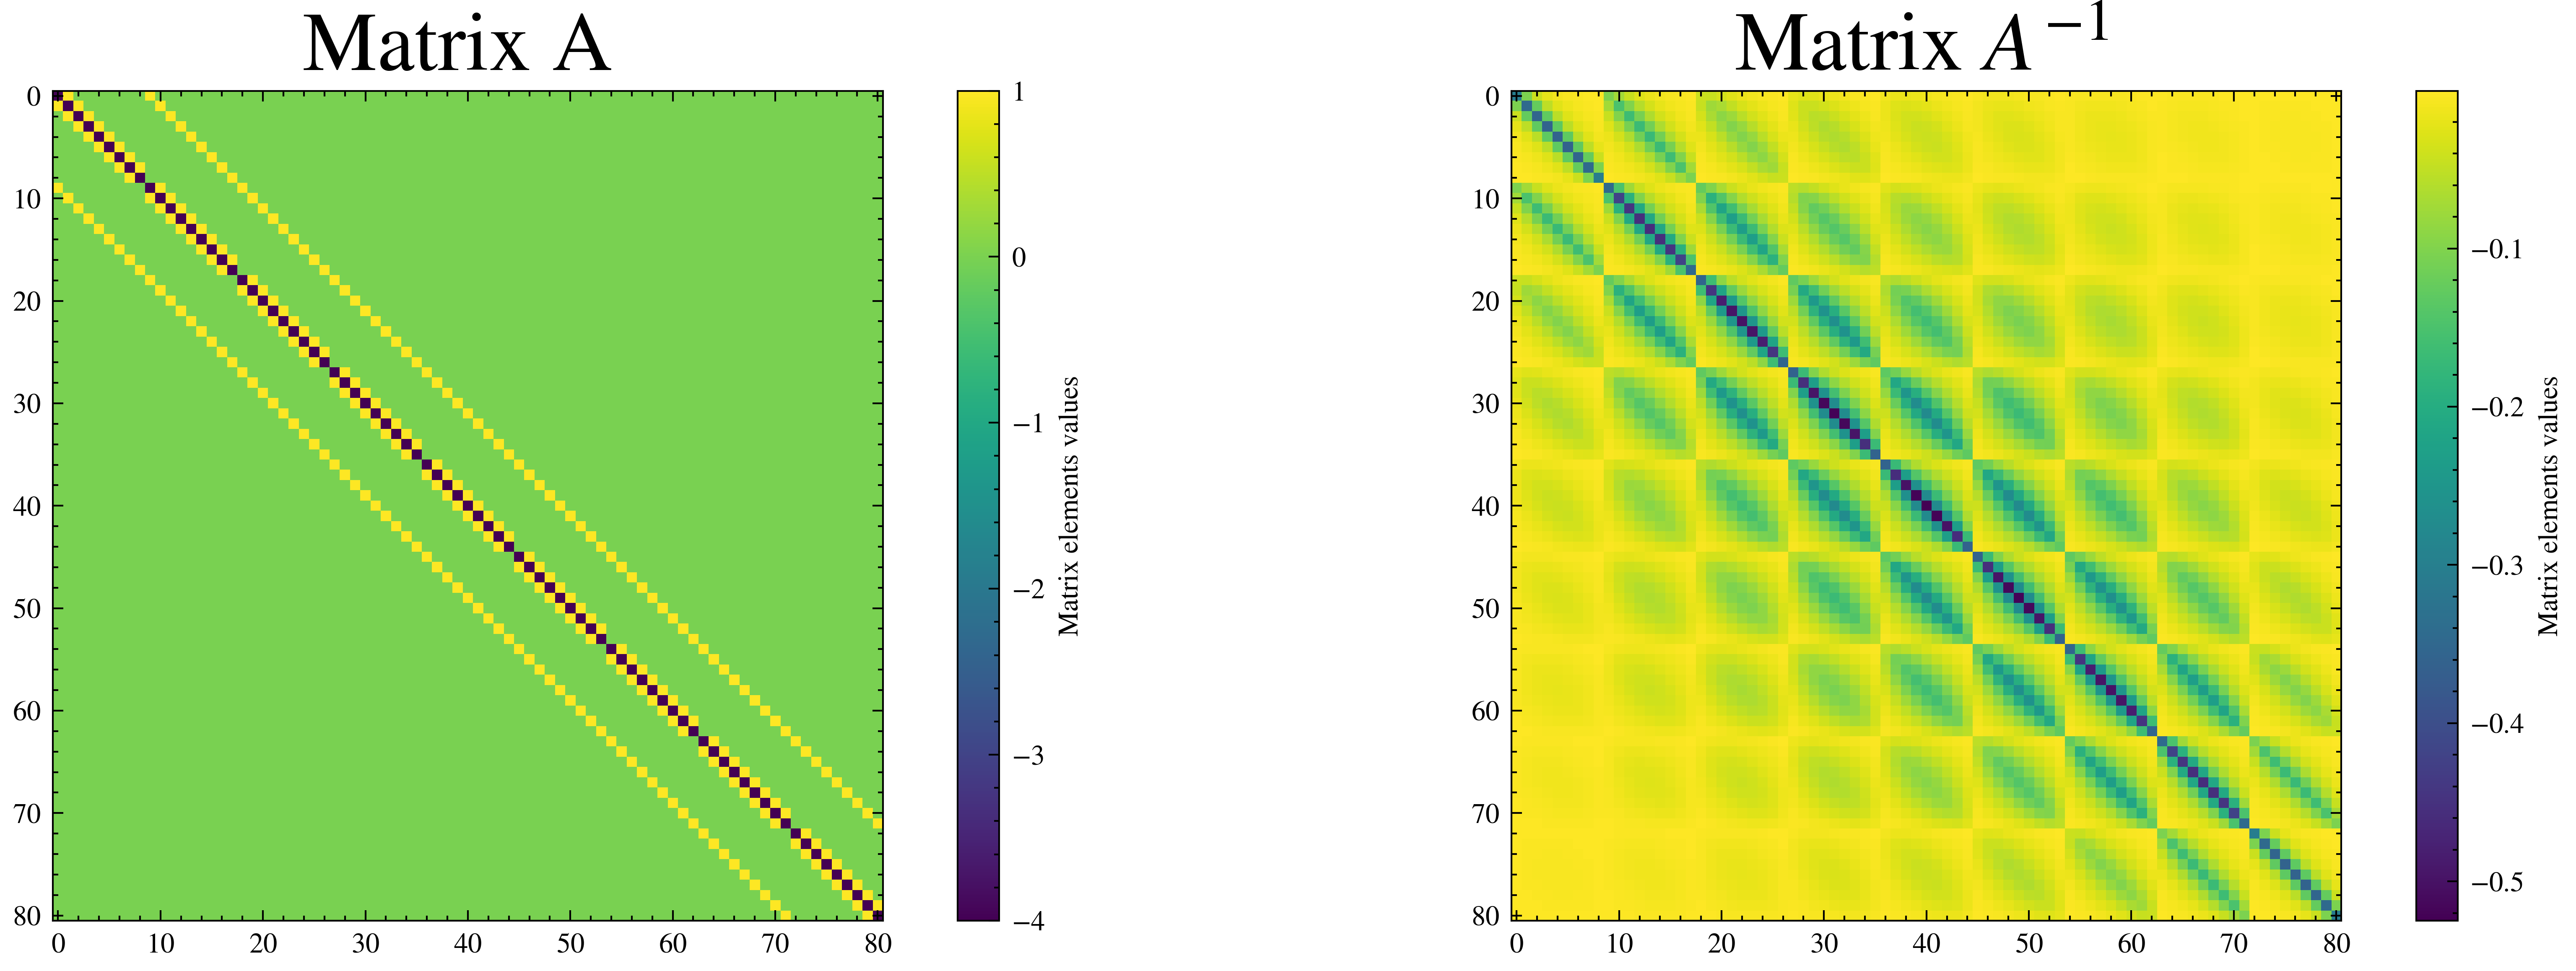

In [24]:
N2=(N-1)*(N-1)
A=np.zeros((N2,N2))
## Diagonal            
for i in range (0,N-1):
    for j in range (0,N-1):           
        A[i+(N-1)*j,i+(N-1)*j]=-4

# LOWER DIAGONAL        
for i in range (1,N-1):
    for j in range (0,N-1):           
        A[i+(N-1)*j,i+(N-1)*j-1]=1   
# UPPPER DIAGONAL        
for i in range (0,N-2):
    for j in range (0,N-1):           
        A[i+(N-1)*j,i+(N-1)*j+1]=1   

# LOWER IDENTITY MATRIX
for i in range (0,N-1):
    for j in range (1,N-1):           
        A[i+(N-1)*j,i+(N-1)*(j-1)]=1        
        
        
# UPPER IDENTITY MATRIX
for i in range (0,N-1):
    for j in range (0,N-2):           
        A[i+(N-1)*j,i+(N-1)*(j+1)]=1
Ainv=np.linalg.inv(A)   
fig = plt.figure(figsize=(12,4));
plt.subplot(121)
plt.imshow(A,interpolation='none');
clb=plt.colorbar();
clb.set_label('Matrix elements values');
plt.title('Matrix A ',fontsize=24)
plt.subplot(122)
plt.imshow(Ainv,interpolation='none');
clb=plt.colorbar();
clb.set_label('Matrix elements values');
plt.title(r'Matrix $A^{-1}$ ',fontsize=24)

fig.tight_layout()
plt.show();

In [25]:
r=np.zeros(N2)

# vector r      
for i in range (0,N-1):
    for j in range (0,N-1):           
        r[i+(N-1)*j]=-h*h*0      
# Boundary        
b_bottom_top=np.zeros(N2)
for i in range (0,N-1):
    b_bottom_top[i]=np.sin(2*np.pi*x[i+1]) #Bottom Boundary
    b_bottom_top[i+(N-1)*(N-2)]=np.sin(2*np.pi*x[i+1])# Top Boundary
      
b_left_right=np.zeros(N2)
for j in range (0,N-1):
    b_left_right[(N-1)*j]=2*np.sin(2*np.pi*y[j+1]) # Left Boundary
    b_left_right[N-2+(N-1)*j]=2*np.sin(2*np.pi*y[j+1])# Right Boundary
    
b=b_left_right+b_bottom_top

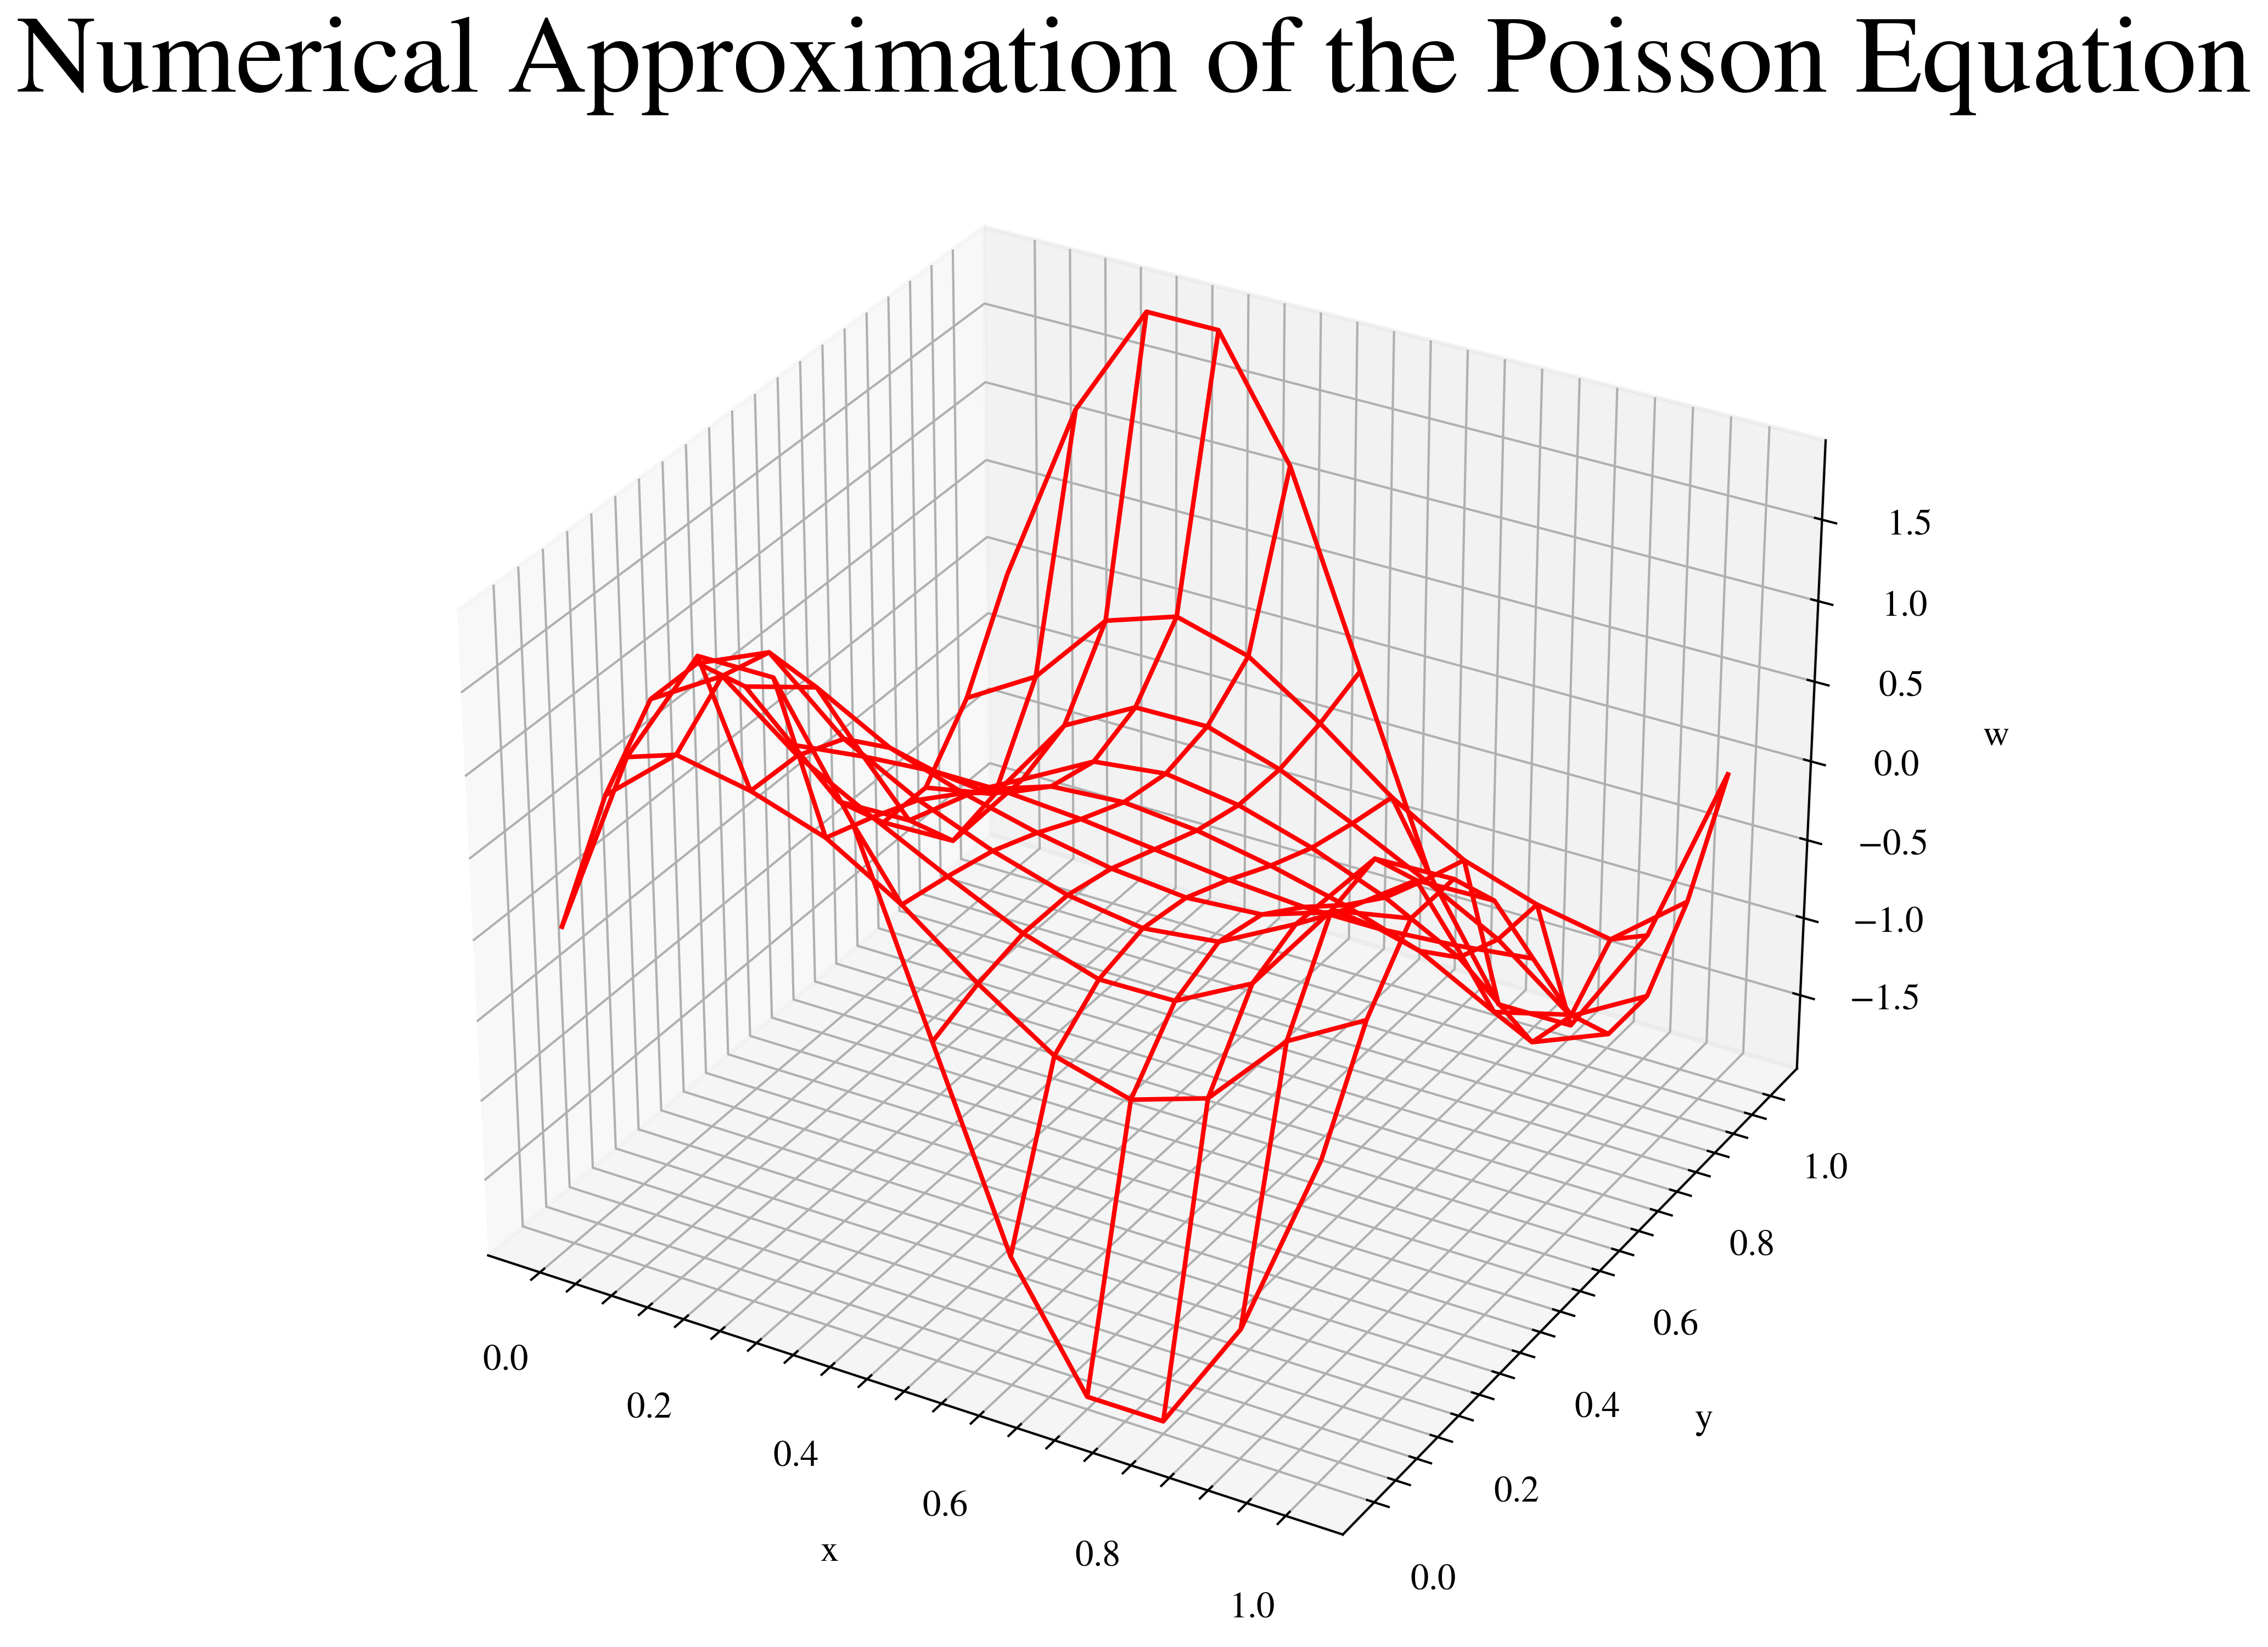

In [26]:
C=np.dot(Ainv,r-b)
w[1:N,1:N]=C.reshape((N-1,N-1))

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d');
# Plot a basic wireframe.
ax.plot_wireframe(X, Y, w,color='r');
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('w');
plt.title(r'Numerical Approximation of the Poisson Equation',fontsize=24,y=1.08);
plt.show();

In [29]:
print("Solution of the Poisson Equation:")
table = []
for i in range(N-1):
    for j in range(N-1):
        table.append([f"{x[i+1]:.4f}", f"{y[j+1]:.4f}", f"{w[i+1, j+1]:.4f}"])
print(tabulate(table, headers=["x", "y", "w"]))

Solution of the Poisson Equation:
  x    y        w
---  ---  -------
0.1  0.1   0.9646
0.1  0.2   0.8765
0.1  0.3   0.7258
0.1  0.4   0.4548
0.1  0.5   0.1119
0.1  0.6  -0.1883
0.1  0.7  -0.3148
0.1  0.8  -0.164
0.1  0.9   0.3215
0.2  0.1   1.2187
0.2  0.2   0.8647
0.2  0.3   0.6207
0.2  0.4   0.3937
0.2  0.5   0.181
0.2  0.6   0.0375
0.2  0.7   0.0443
0.2  0.8   0.2882
0.2  0.9   0.8624
0.3  0.1   1.1433
0.3  0.2   0.7427
0.3  0.3   0.4988
0.3  0.4   0.3183
0.3  0.5   0.181
0.3  0.6   0.1128
0.3  0.7   0.1663
0.3  0.8   0.4102
0.3  0.9   0.9378
0.4  0.1   0.7097
0.4  0.2   0.4641
0.4  0.3   0.3133
0.4  0.4   0.1999
0.4  0.5   0.1119
0.4  0.6   0.0666
0.4  0.7   0.0977
0.4  0.8   0.2485
0.4  0.9   0.5765
0.5  0.1   0.0559
0.5  0.2   0.0905
0.5  0.3   0.0905
0.5  0.4   0.0559
0.5  0.5  -0
0.5  0.6  -0.0559
0.5  0.7  -0.0905
0.5  0.8  -0.0905
0.5  0.9  -0.0559
0.6  0.1  -0.5765
0.6  0.2  -0.2485
0.6  0.3  -0.0977
0.6  0.4  -0.0666
0.6  0.5  -0.1119
0.6  0.6  -0.1999
0.6  0.7  -0.3133
0.